In [1]:
import os
os.chdir(r'E:\PGP-DSBA\Predictive model')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# LINEAR REGRESSION

## 1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [3]:
firm_data = pd.read_csv('Firm_level_data.csv', index_col= 0)

In [4]:
firm_data.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [5]:
firm_data.shape

(759, 9)

In [6]:
firm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 59.3+ KB


In [7]:
firm_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,759.0,2689.705158,8722.060124,0.138000,122.920000,448.577082,1822.547366,135696.788200
capital,759.0,1977.747498,6466.704896,0.057000,52.650501,202.179023,1075.790020,93625.200560
patents,759.0,25.831357,97.259577,0.000000,1.000000,3.000000,11.500000,1220.000000
randd,759.0,439.938074,2007.397588,0.000000,4.628262,36.864136,143.253403,30425.255860
employment,759.0,14.164519,43.321443,0.006000,0.927500,2.924000,10.050001,710.799925
tobinq,738.0,2.794910,3.366591,0.119001,1.018783,1.680303,3.139309,20.000000
value,759.0,2732.734750,7071.072362,1.971053,103.593946,410.793529,2054.160386,95191.591160
institutions,759.0,43.020540,21.685586,0.000000,25.395000,44.110000,60.510000,90.150000


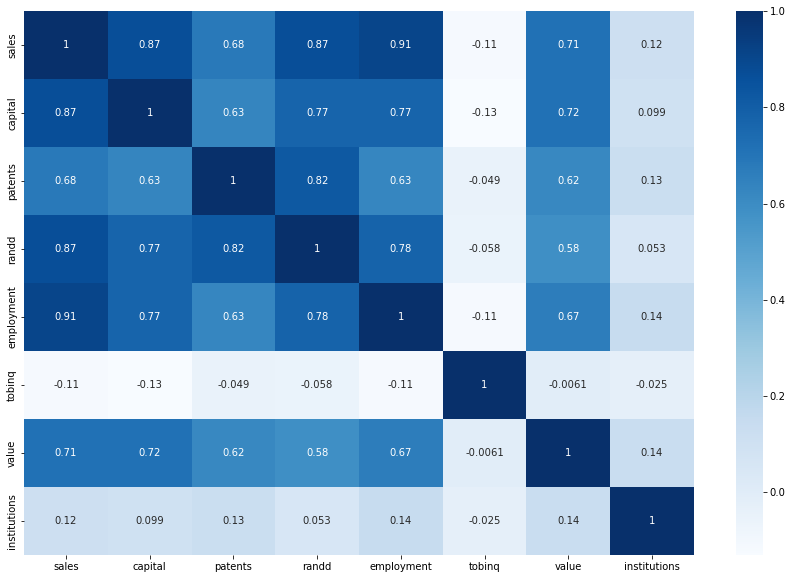

In [8]:
corr = firm_data.corr()
plt.figure(figsize= (15,10))
sns.heatmap(corr, annot= True, cmap= 'Blues');

<Figure size 1440x720 with 0 Axes>

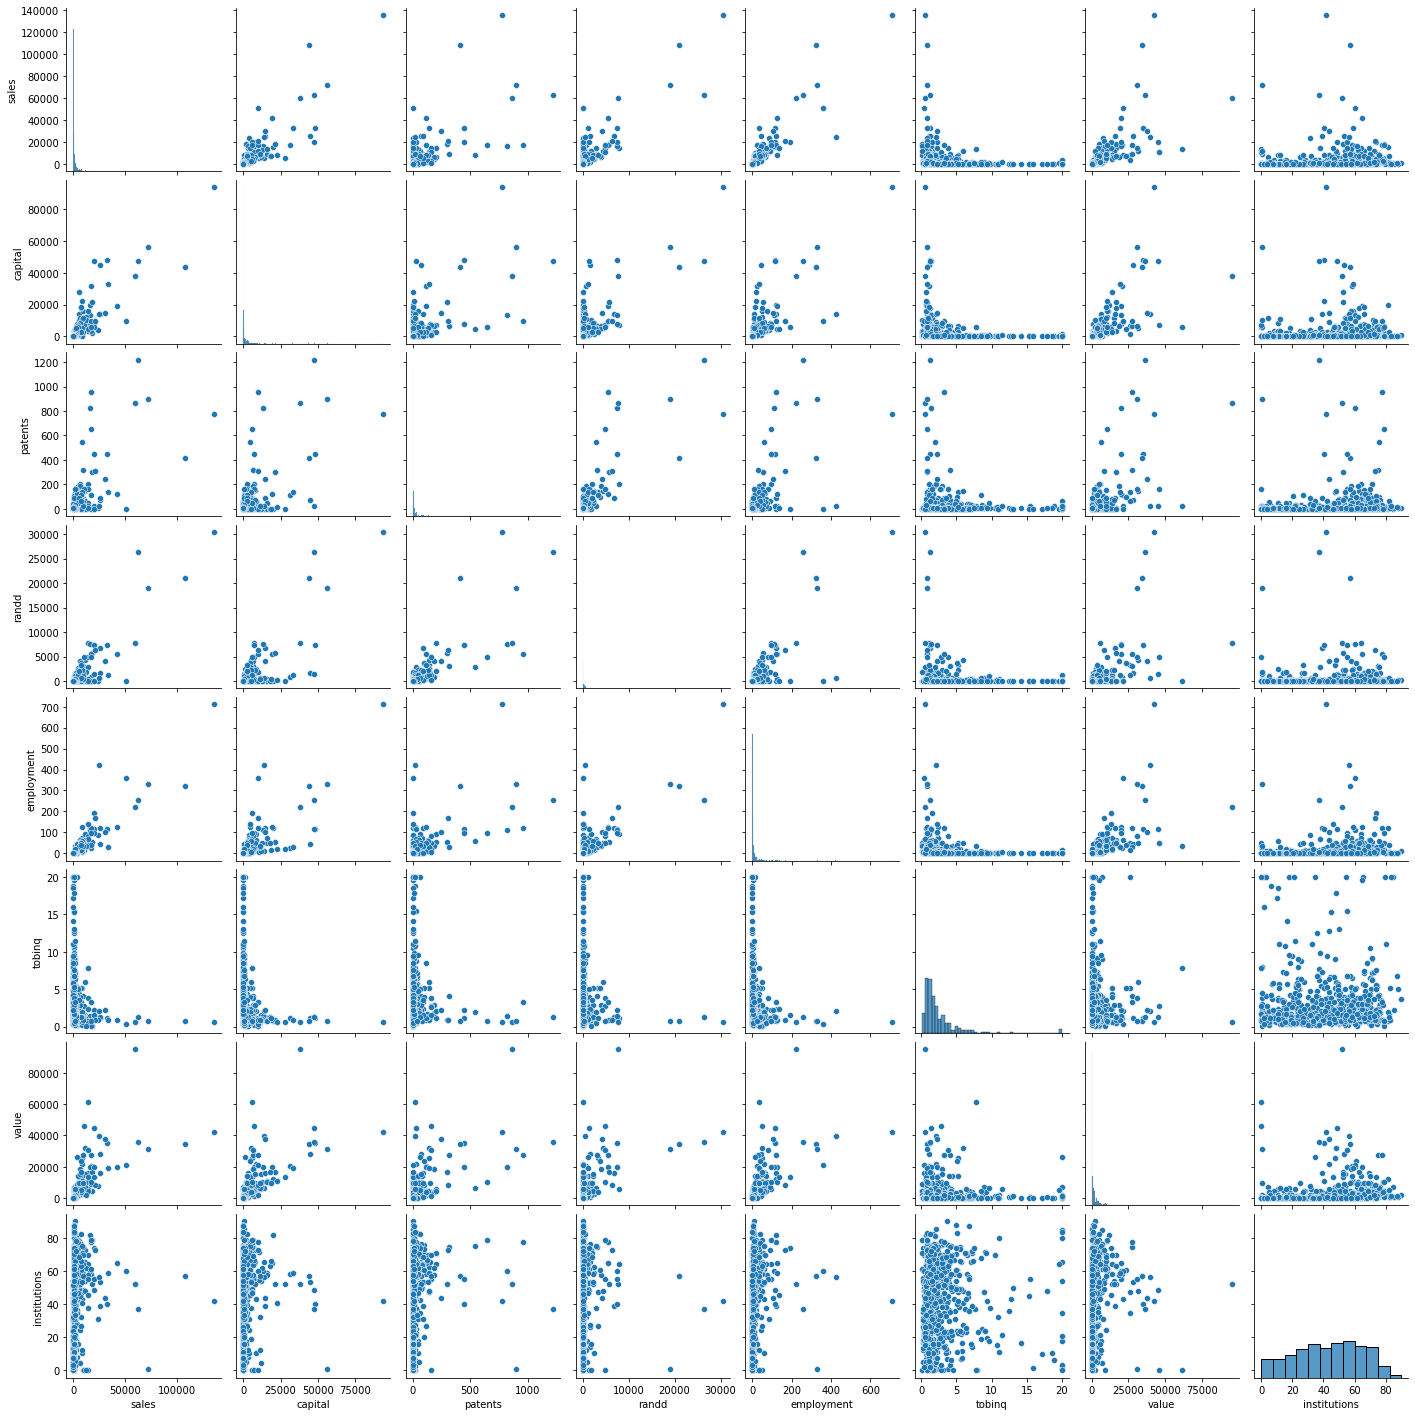

In [9]:
plt.figure(figsize= (20,10))
sns.pairplot(firm_data);

### Univariate Analysis

In [10]:
def univariate_analysis_numeric(column):
    plt.figure(figsize=(10,7))
    print('Distribution of '+ column)
    sns.boxplot(firm_data[column])
    plt.show()

In [11]:
firm_data.dtypes

sales           float64
capital         float64
patents           int64
randd           float64
employment      float64
sp500            object
tobinq          float64
value           float64
institutions    float64
dtype: object

In [12]:
firm_numeric = firm_data.drop('sp500', axis =1)
firm_numeric.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,1.063300,67.406408,49.46


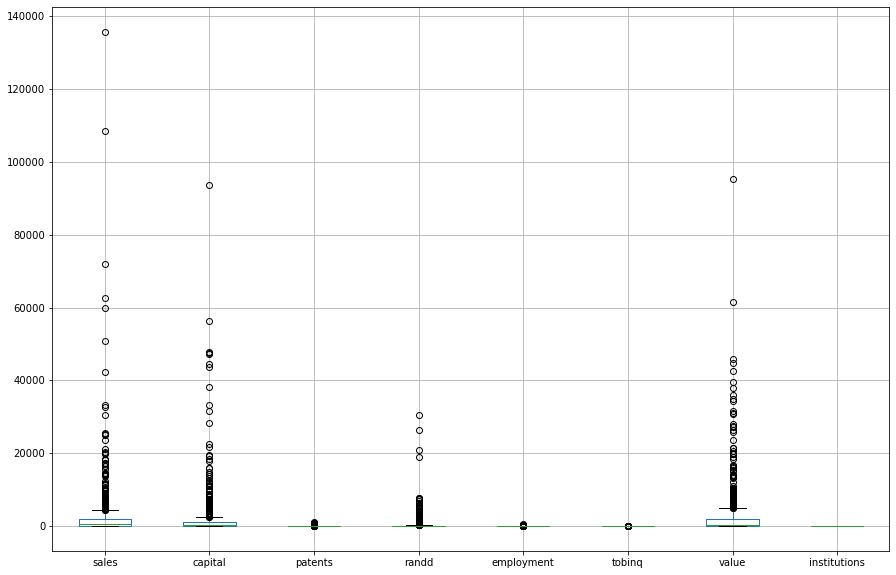

In [13]:
plt.figure(figsize=(15,10))
firm_numeric.boxplot();

In [14]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [15]:
for column in firm_numeric.columns:
    lr,ur=remove_outlier(firm_numeric[column])
    firm_numeric[column]=np.where(firm_numeric[column]>ur,ur,firm_numeric[column])
    firm_numeric[column]=np.where(firm_numeric[column]<lr,lr,firm_numeric[column])

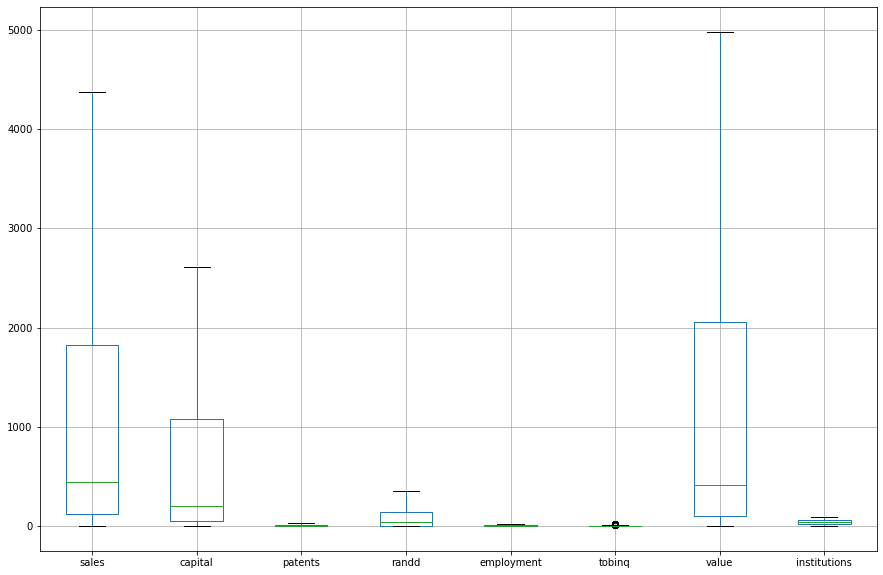

In [16]:
plt.figure(figsize=(15,10))
firm_numeric.boxplot();

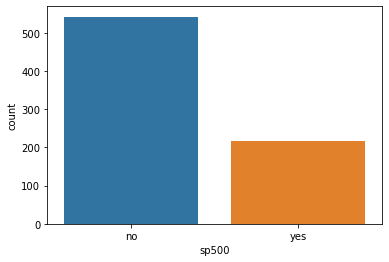

In [17]:
sns.countplot(data= firm_data, x= 'sp500');

## Bivariate Analysis

In [18]:
firm_data.columns

Index(['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq',
       'value', 'institutions'],
      dtype='object')

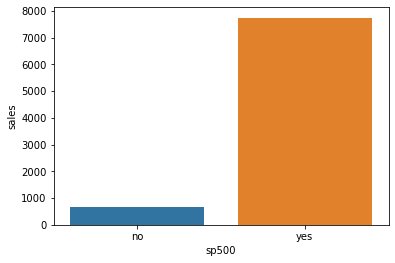

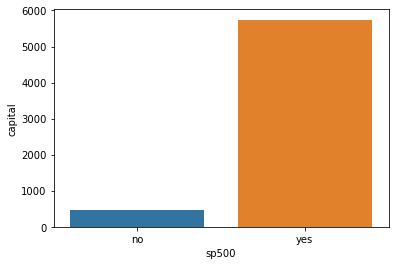

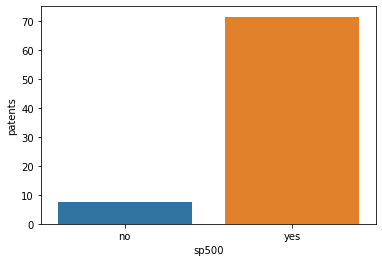

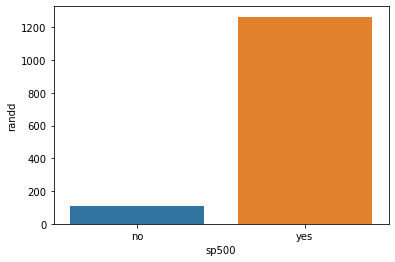

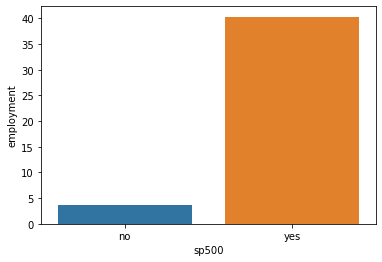

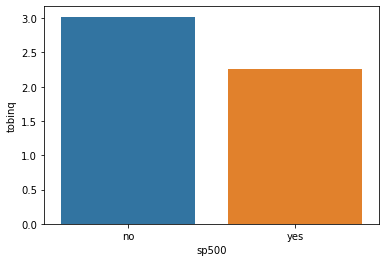

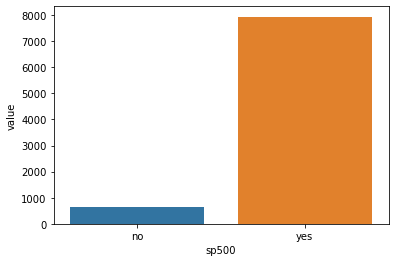

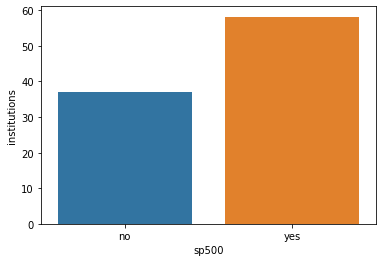

In [19]:
for col in firm_numeric.columns:
    sns.barplot(data=firm_numeric, x= firm_data['sp500'], y= firm_data[col], ci= False)
    plt.show()

## 1.2) Impute null values if present? Do you think scaling is necessary in this case? (8 marks)

In [20]:
firm_data.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [21]:
firm_data['tobinq'] = firm_data['tobinq'].fillna(firm_data['tobinq'].median())

In [22]:
firm_data.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

## 1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (30:70). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R-square, RMSE.

In [23]:
firm_data['sp500'].value_counts()

no     542
yes    217
Name: sp500, dtype: int64

In [24]:
firm_data['sp500'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
firm_data['sp500']= firm_data['sp500'].astype('category')

In [26]:
firm_data.dtypes

sales            float64
capital          float64
patents            int64
randd            float64
employment       float64
sp500           category
tobinq           float64
value            float64
institutions     float64
dtype: object

In [27]:
firm_data['sp500']= firm_data['sp500'].cat.codes

In [28]:
firm_data.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,0,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,0,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,1,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,0,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,0,1.063300,67.406408,49.46


In [29]:
from sklearn.model_selection import train_test_split

X = firm_data.drop('sales', axis = 1)
y= firm_data.pop('sales')

In [30]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [105]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [106]:
lr.fit(X_train, y_train)

LinearRegression()

In [112]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [113]:
lr.score(X_train, y_train_pred_lr)

1.0

In [119]:
lr.score(X_test, y_test_pred_lr)

1.0

In [115]:
print('The coefficient of determination R^2 of the prediction on Train set',lr.score(X_train, y_train_pred_lr))

The coefficient of determination R^2 of the prediction on Train set 1.0


In [116]:
print('The coefficient of determination R^2 of the prediction on Test set',lr.score(X_test, y_test_pred_lr))

The coefficient of determination R^2 of the prediction on Test set 1.0


In [117]:
from sklearn.metrics import mean_squared_error
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,lr.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 19726391557.63931


In [120]:
print("The Root Mean Square Error (RMSE) of the model is for training set is",np.sqrt(mean_squared_error(y_train,lr.predict(X_train))))

The Root Mean Square Error (RMSE) of the model is for training set is 0.09519768377842565
